# Imports

In [47]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,roc_curve,auc

# Creating DataFrame

In [48]:
heart_data= {
    "Age": [29, 54, 37, 45, 63, 50, 48, 40, 58, 42, 55, 47, 35, 62, 53],
    "Cholesterol": [200, 230, 180, 195, 240, 210, 190, 220, 210, 205, 250, 215, 185, 245, 225],
    "Max_Heart_Rate": [150, 120, 165, 140, 110, 155, 145, 135, 125, 145, 115, 130, 160, 118, 135],
    "Exercise_Induced_Angina": [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
    "Heart_Disease": [1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],  # Balanced target variable
}

In [49]:
df=pd.DataFrame(heart_data)

# Handling Missing Values

In [50]:
df.isna().sum()

Age                        0
Cholesterol                0
Max_Heart_Rate             0
Exercise_Induced_Angina    0
Heart_Disease              0
dtype: int64

In [51]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Cholesterol']=df['Cholesterol'].fillna(math.floor(df['Cholesterol'].mean()))
df['Max_Heart_Rate']=df['Max_Heart_Rate'].fillna(df['Max_Heart_Rate'].median())
df['Exercise_Induced_Angina']=df['Exercise_Induced_Angina'].ffill()

# Encoding

In [52]:
object_cols=df.select_dtypes(include=object).columns
df[object_cols]=df[object_cols].astype(int)
df

,Age,Cholesterol,Max_Heart_Rate,Exercise_Induced_Angina,Heart_Disease
0,29,200,150,1,1
1,54,230,120,0,1
2,37,180,165,0,0
3,45,195,140,1,0
4,63,240,110,1,1
5,50,210,155,0,0
6,48,190,145,1,1
7,40,220,135,0,0
8,58,210,125,1,1
9,42,205,145,0,0


# Splitting

In [53]:
y=df['Heart_Disease']
x=df.drop(columns=['Heart_Disease'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Normalisaton

In [54]:
normalizer=MinMaxScaler()
x_train=pd.DataFrame(normalizer.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(normalizer.transform(x_test),columns=x_test.columns)

# Training

## BernouliNB

In [55]:
bernouiModel=BernoulliNB()

In [56]:
bernouiModel.fit(x_train,y_train)

BernoulliNB()

## GaussianNB

In [57]:
gaussinaModel=GaussianNB()

In [58]:
gaussinaModel.fit(x_train,y_train)

GaussianNB()

# Evaluation

In [59]:
y_pred_bernouli=bernouiModel.predict(x_test)
y_pred_gaussian=gaussinaModel.predict(x_test)

In [60]:
bernouliAccuracy=accuracy_score(y_test,y_pred_bernouli)
gaussianAccuracy=accuracy_score(y_test,y_pred_gaussian)


In [61]:
print("Bernouli Accuracy:",bernouliAccuracy)
print("Gaussina Accuracy:",gaussianAccuracy)

Bernouli Accuracy: 0.0
Gaussina Accuracy: 0.3333333333333333


In [62]:
fpr_bernouli,tpr_bernouli,_=roc_curve(y_test,y_pred_bernouli)

In [63]:
auc_bernouli=auc(y_test,y_pred_bernouli)

In [64]:
fpr_gaussian,tpr_gausian,_=roc_curve(y_test,y_pred_gaussian)

In [65]:
auc_gaussian=auc(y_test,y_pred_gaussian)

In [66]:
import matplotlib.pyplot as plt

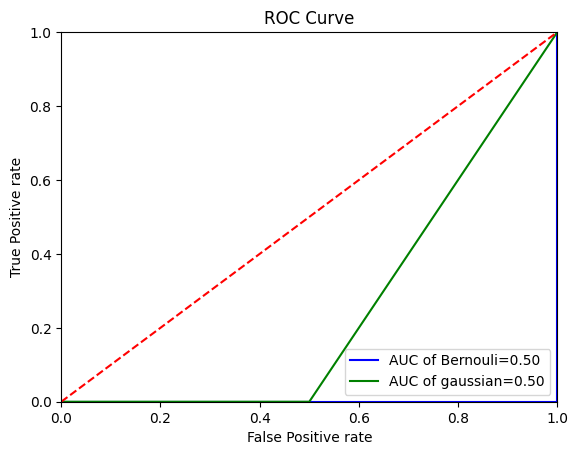

In [68]:
plt.title("ROC Curve")
plt.plot(fpr_bernouli,tpr_bernouli,'b',label=f"AUC of Bernouli={auc_bernouli:.2f}")
plt.plot(fpr_gaussian,tpr_gausian,'g',label=f"AUC of gaussian={auc_gaussian:.2f}")
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive rate")
plt.xlabel("False Positive rate")
plt.show()